# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [10]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [11]:
#Type your code here
df = pd.read_csv("./data_raw/heart_disease.csv")
print(f"Jumlah baris dan kolom : {df.shape}")

df.head()

Jumlah baris dan kolom : (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Total Missing Value


'No Missing Value'

Statistik Deskriptif


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Heatmap Korelation


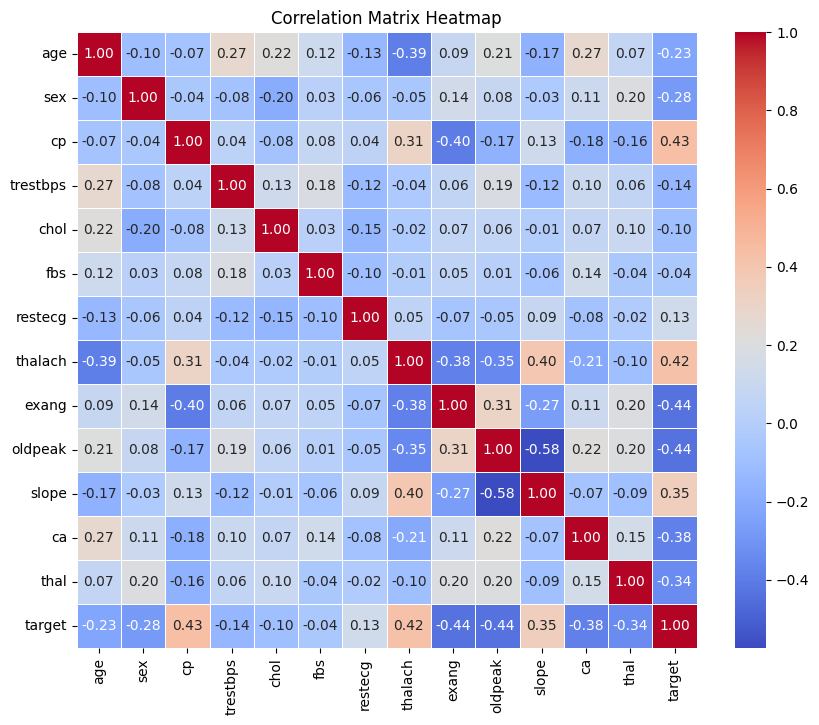

In [12]:
#Type your code here
def quick_eda(df):
    print("Data Information")
    df.info()

    print("Total Missing Value")
    missingVal = df.isnull().sum()
    missingValMsg = missingVal[missingVal > 0] if missingVal.sum() > 0 else "No Missing Value"
    display(missingValMsg)

    print("Statistik Deskriptif")
    display(df.describe())

    print("Heatmap Korelation")
    df_numeric = df.select_dtypes(include=['number'])

    if not df_numeric.empty:
        plt.figure(figsize=(10, 8))

        corr_matrix = df_numeric.corr()

    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

    plt.title("Correlation Matrix Heatmap")
    plt.show()

quick_eda(df)

C:\Users\Lucky\AppData\Local\Temp\ipykernel_18944\4289273214.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='pastel')


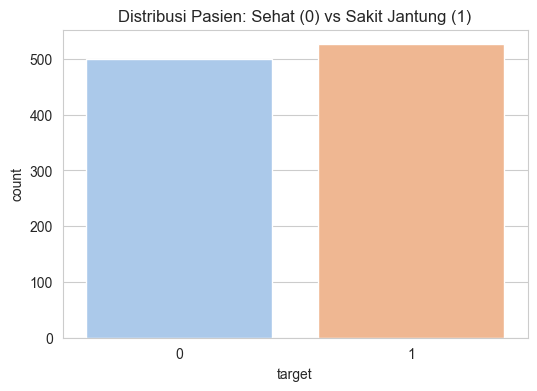

C:\Users\Lucky\AppData\Local\Temp\ipykernel_18944\4289273214.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, ax=axes[i, 1], palette='husl')
C:\Users\Lucky\AppData\Local\Temp\ipykernel_18944\4289273214.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, ax=axes[i, 1], palette='husl')
C:\Users\Lucky\AppData\Local\Temp\ipykernel_18944\4289273214.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, ax=axes[i, 1], palette='husl')
C:\Users\Lucky\AppData

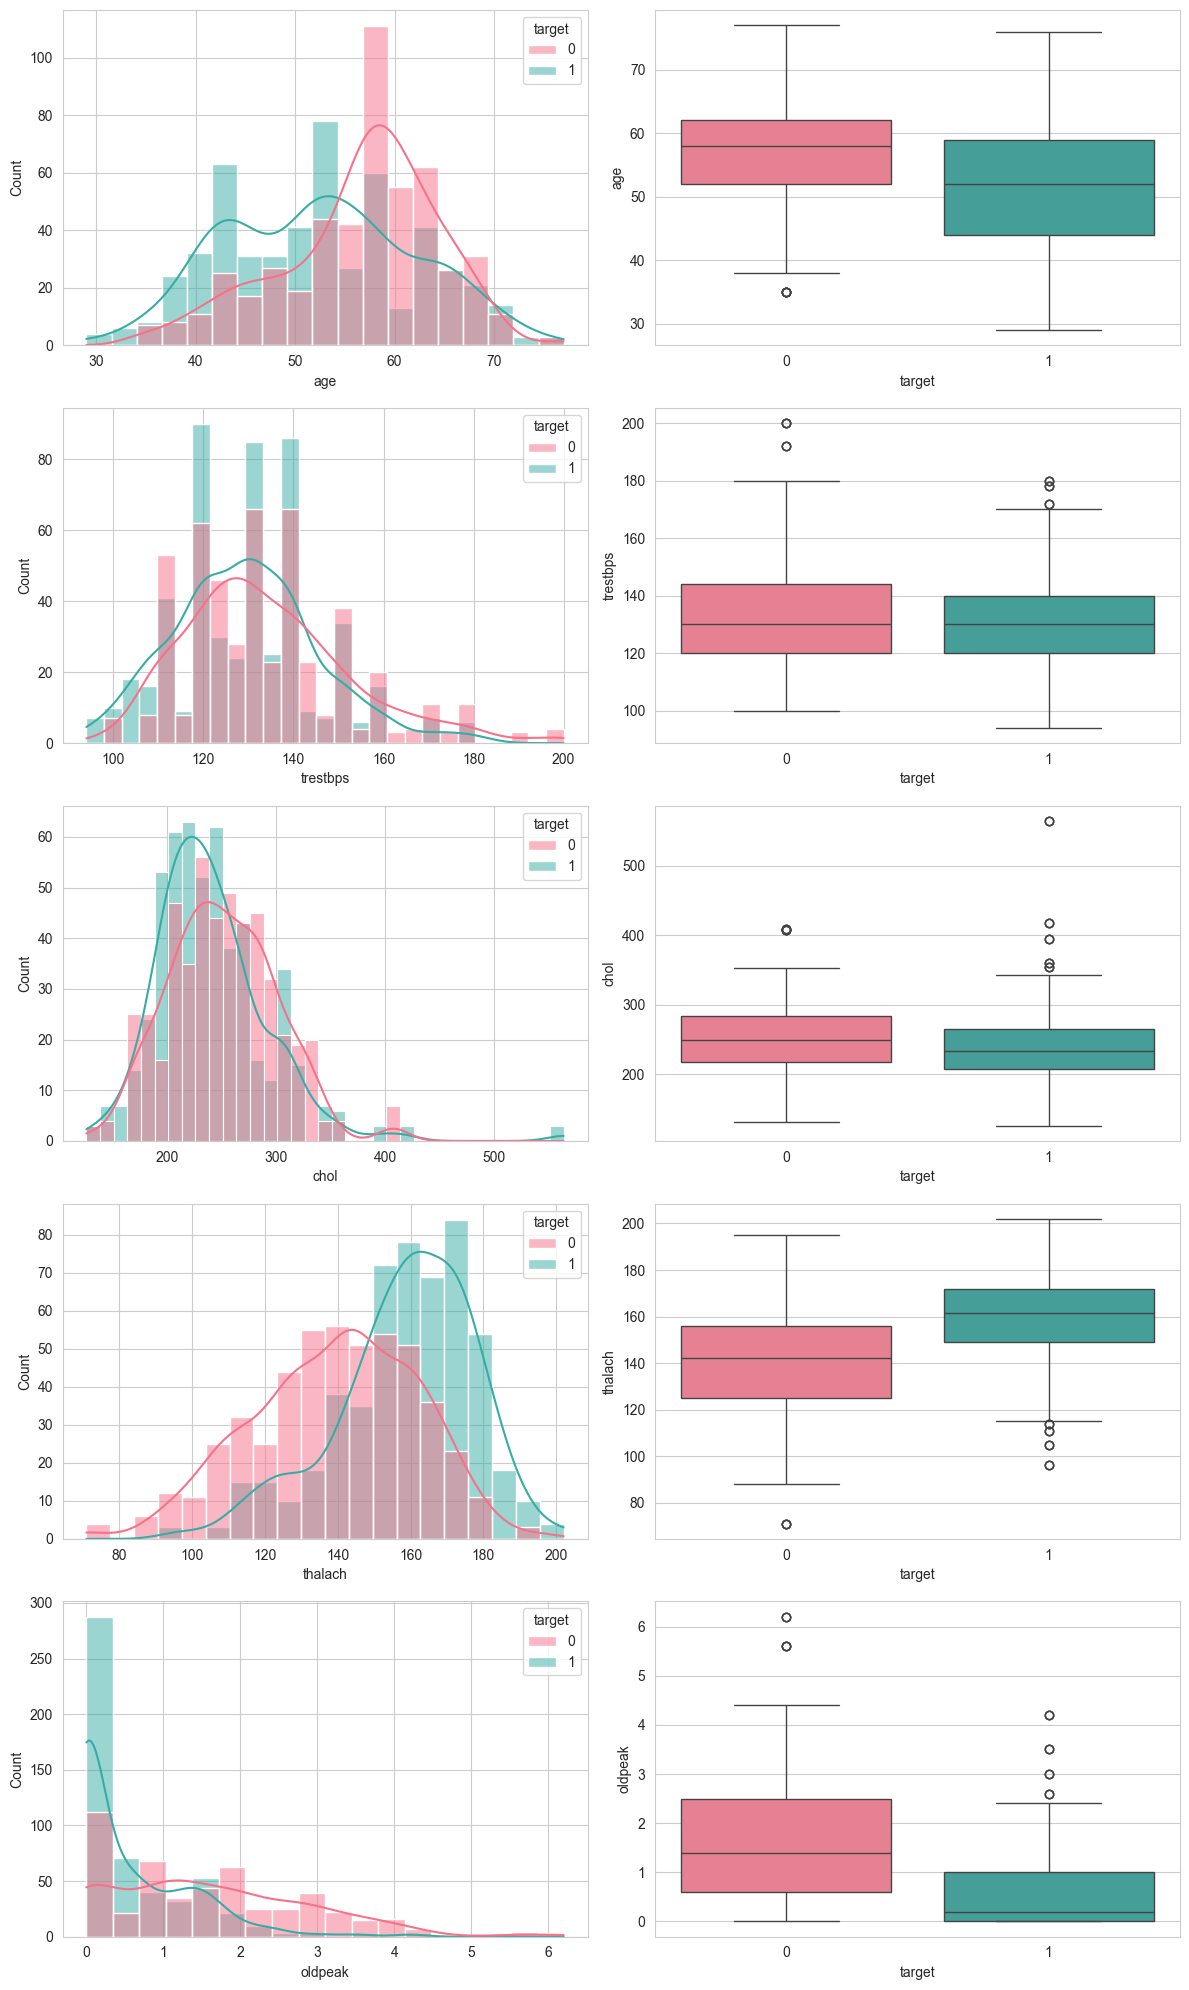

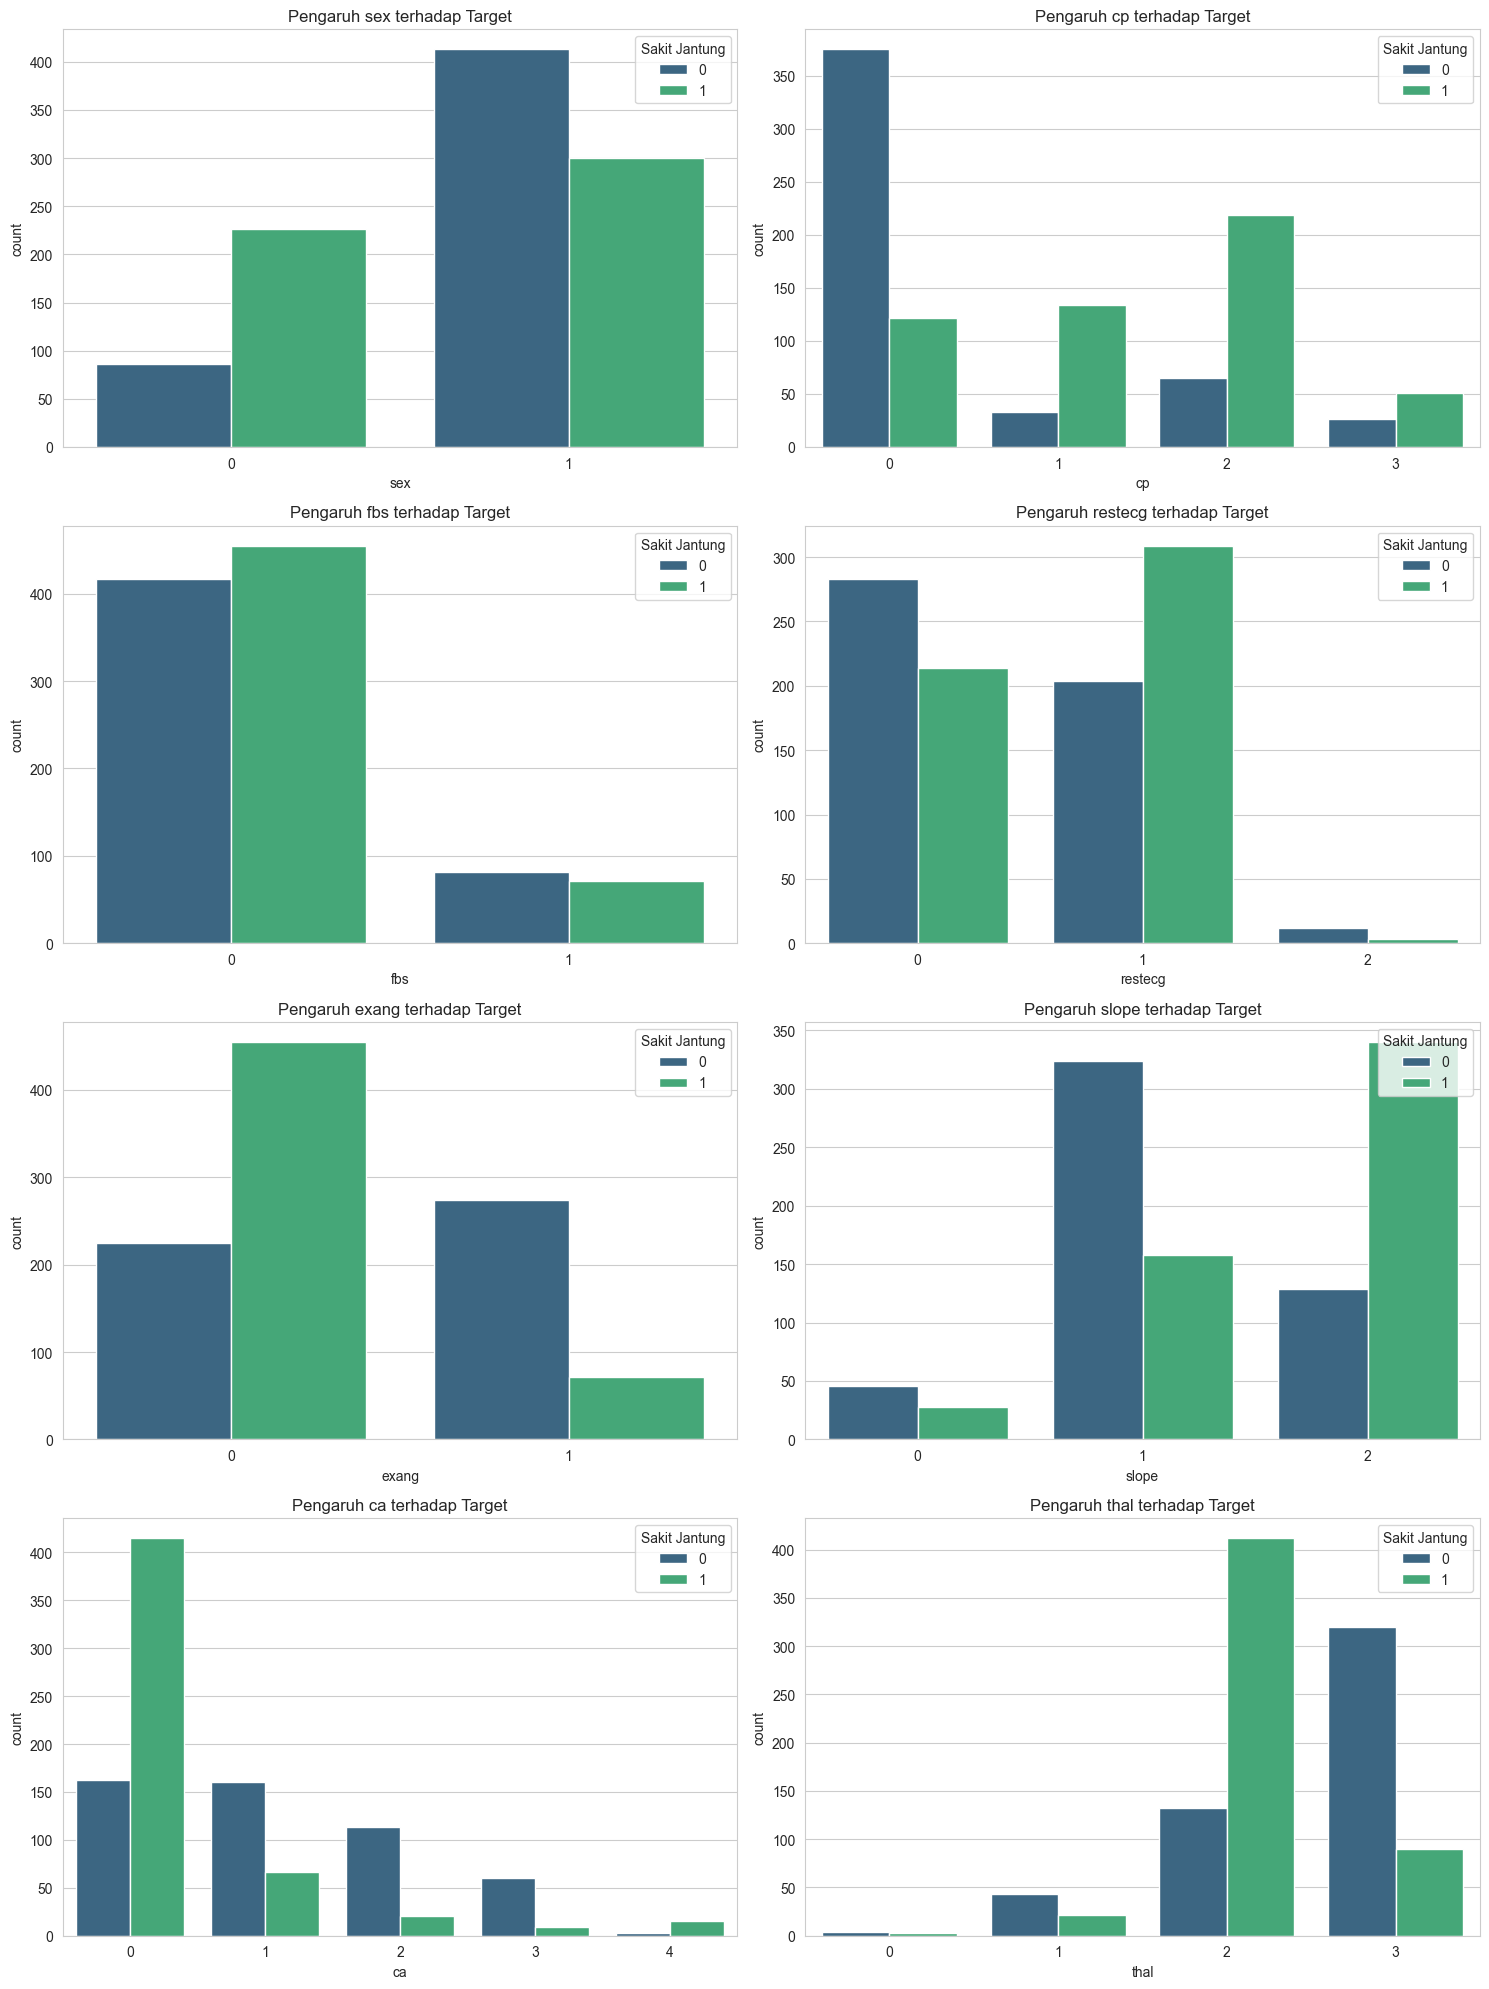

In [17]:
import math

def visualize_heart_disease(df, target_col="target"):
    sns.set_style("whitegrid")
    
    cat_cols = [col for col in df.columns if df[col].nunique() < 10 and col != target_col]
    num_cols = [col for col in df.columns if df[col].nunique() >= 10 and col != target_col]
    
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_col, data=df, palette='pastel')
    plt.title(f'Distribusi Pasien: Sehat (0) vs Sakit Jantung (1)')
    plt.show()

    n_rows = len(num_cols)
    if n_rows > 0:
        fig, axes = plt.subplots(n_rows, 2, figsize=(12, n_rows * 4)) 
        for i, col in enumerate(num_cols):
            sns.histplot(data=df, x=col, kde=True, hue=target_col, ax=axes[i, 0], palette='husl')
            sns.boxplot(data=df, x=target_col, y=col, ax=axes[i, 1], palette='husl')
        plt.tight_layout()
        plt.show()

    if len(cat_cols) > 0:
        n_cols_plot = 2
        n_rows_plot = math.ceil(len(cat_cols) / n_cols_plot)
        fig, axes = plt.subplots(n_rows_plot, n_cols_plot, figsize=(15, n_rows_plot * 5))
        axes = axes.flatten()
        for i, col in enumerate(cat_cols):
            sns.countplot(data=df, x=col, hue=target_col, ax=axes[i], palette='viridis')
            axes[i].legend(title='Sakit Jantung', loc='upper right')
            axes[i].set_title(f'Pengaruh {col} terhadap Target')
        
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        plt.tight_layout()
        plt.show()

visualize_heart_disease(df, target_col="target")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
def preprocess_heart_data(df):
    df = df[df['chol'] <= 500].copy()

    cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

    num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    scaler = StandardScaler()
    df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])

    return df_encoded

df_clean = preprocess_heart_data(df)
print("After Preprocessing")
display(df_clean.head())

After Preprocessing


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.264729,-0.380366,-0.679329,0.821776,-0.059498,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True
1,-0.154299,0.476254,-0.864228,0.257065,1.726440,0,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,1.723006,0.761795,-1.460013,-1.046113,1.301217,0,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,0.729139,0.933119,-0.864228,0.517701,-0.909945,0,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,0.839569,0.362038,1.005304,-1.871459,0.705904,0,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False
